In [11]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
from ibm_quantum_widgets import CircuitComposer

import time

from qiskit.providers.aer import noise

from qiskit.providers.ibmq import least_busy

%matplotlib inline



# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-14 08:33:03,600: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
#### Exact Time Dynamics
## Pauli matrices

S_x = np.matrix([[0.0,1.0],[1.0,0.0]])
S_y = np.matrix([[0.0,-1.0j],[1.0j,0.0]])
S_z = np.matrix([[1.0,0.0],[0.0,-1.0]])
Id = np.matrix([[1.0,0.0],[0.0,1.0]])

## Single qubit states 0 and 1 in computational basis
vect_0 = np.matrix([[1.0],[0.0]])
vect_1 = np.matrix([[0.0],[1.0]])



In [13]:
## The Schwinger model parameters
mu = 0.1
x = 0.6

In [14]:
## Unitarytime evolution operator under H

def U_exact(t,x,mu):
    H = (x/np.sqrt(2))*np.kron(S_x,S_x) + (x/np.sqrt(2))*np.kron(S_y,S_y) - mu*np.kron(S_z,S_z) +\
    x*(1.0 + (1.0/np.sqrt(2)))*np.kron(Id,S_x) - 0.5*np.kron(Id,S_z) - (1.0 + mu)*np.kron(S_z,Id) +\
    x*(1.0 - (1.0/np.sqrt(2)))*np.kron(S_z, S_x)
    return expm(-1.0j*t*H)


Probability 01 =  [0.0, 0.014279532227667731, 0.05569589690867274, 0.1201536813864746, 0.20137353020348137, 0.2916295751523156, 0.38263162083894314, 0.4664317568927078, 0.5362372307766643, 0.587031522308546, 0.6159394179540106, 0.6223130899996523, 0.607557410658409, 0.5747471148374631, 0.528110837539648, 0.4724649524394642, 0.4126738840283906, 0.3531961238930574, 0.2977513311140845, 0.2491191063043279]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

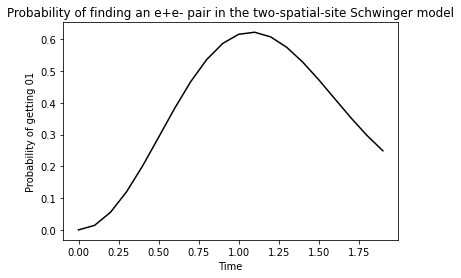

In [15]:
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_med = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_med.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_med)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_med, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.00014398790449350396, 0.0005758064955817693, 0.0012950205836890227, 0.002300905444598634, 0.003592447706157227, 0.005168346587841301, 0.007027015491370873, 0.009166583940041228, 0.01158489986393448, 0.014279532227667731, 0.017247773996835664, 0.020486645438812977, 0.023992897753096546, 0.027763017025890385, 0.03179322850316771, 0.036079501175986926, 0.040617552671389376, 0.045402854441769905, 0.05043063724518803]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

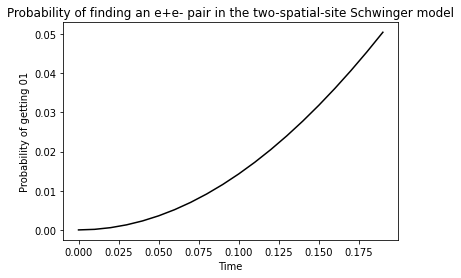

In [16]:
# time step (dt=0.01)
dt = 0.01
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_small = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_small.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_small)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_small, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.2916295751523156, 0.6159394179540106, 0.4724649524394642, 0.20905926086450743, 0.13492407065942236, 0.12414949652447956, 0.07717182224711708, 0.2826906394548993, 0.6944743696775955, 0.6232798879529129, 0.13668207339677807, 0.035336012581686775, 0.3476854719196155, 0.5055732286699276, 0.34695911065882246, 0.2142080114898531, 0.2184673861776303, 0.08516452672437075, 0.07501644921450618]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

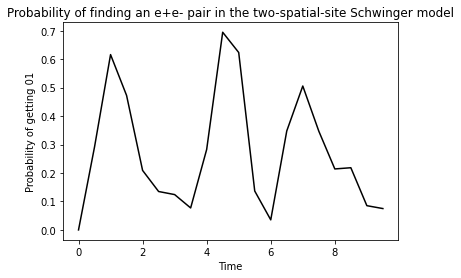

In [17]:
# time step (dt=0.5)
dt = 0.5
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_large = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_large.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_large)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_large, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

In [18]:
#### Trotterized Time Dynamics with Qiskit

# registers and quantum circuit
q = QuantumRegister(2,'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# single first order Trotter step circuit
def U_trot(dt,q):
    circ.rxx(-2.0*(x/np.sqrt(2))*dt, 0, 1) 
    circ.sdg(q)
    circ.rxx(-2.0*(x/np.sqrt(2)*dt), 0, 1)
    circ.s(q)
    circ.h(q)
    circ.rxx(2.0*mu*dt, 0, 1) 
    circ.h(q)
    circ.rx(-2.0*x*(1.0 + (1.0/np.sqrt(2)))*dt, 1)
    circ.rz(1.0*dt, 1) 
    circ.rz(2.0*(1.0 + mu)*dt, 0)
    circ.h(0)
    circ.rxx(-2.0*x*(1.0 - (1.0/np.sqrt(2)))*dt, 0, 1) 
    circ.h(0)
    return circ

# approximate unitary propagator for t = dt*nSteps
def U_approx(circ, dt, nSteps, q):
    if nSteps>0:
        for ind in range(nSteps): 
            circ = U_trot(dt, q)  
    else: 
        circ = U_trot(0,q)
    return circ
    


Probability 01 =  [8.024582750190568e-32, 0.014313156771279416, 0.056026902699410464, 0.12129368419059881, 0.20398326507098963, 0.29639051486161255, 0.39011053854319555, 0.47696159768404267, 0.5498342224999619, 0.6033615686009527, 0.6343378778320995, 0.6418528090240887, 0.6271520713363146, 0.5932720056577452, 0.5445217666459916, 0.4858982665517088, 0.42251568446160365, 0.3591155418376728, 0.299699617579819, 0.24730186704778465]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

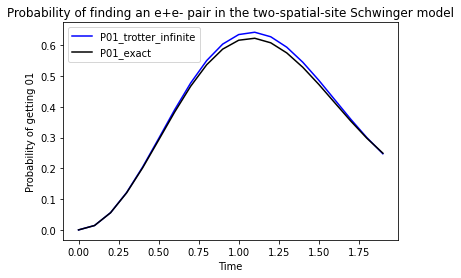

In [20]:
#### Infinite number of measurements
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]
# number of measurements per task
nShots = 0

P01_trotter = []

# Select local simulator as backend device (statevector)
backend = Aer.get_backend('statevector_simulator')

# run 20 time steps
for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    job = execute(circ, backend, shots = nShots) 
    result = job.result() # collect run results
    outputstatee = result.get_statevector(circ) 
    P01_trotter.append(np.abs(outputstatee[2])**2) 

print('Probability 01 = ', P01_trotter)

Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_trotter, 'blue', label='P01_trotter_infinite')
plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')



Time per time step= [0.029722213745117188, 0.028237104415893555, 0.040935516357421875, 0.05167412757873535, 0.06419253349304199, 0.08003401756286621, 0.10071086883544922, 0.08751845359802246, 0.12839818000793457, 0.13183927536010742, 0.1280057430267334, 0.13599586486816406, 0.16184735298156738, 0.24782466888427734, 0.30219554901123047, 0.17050433158874512, 0.2039031982421875, 0.21014761924743652, 0.20757031440734863, 0.23211908340454102]

Total time= 2.7439560890197754

Probability 01 =  [0, 0.008, 0.046, 0.122, 0.214, 0.272, 0.362, 0.482, 0.5660000000000001, 0.588, 0.598, 0.672, 0.604, 0.61, 0.518, 0.544, 0.426, 0.33, 0.302, 0.228]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

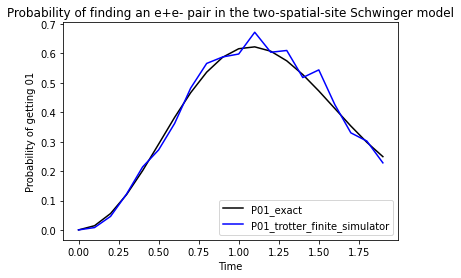

In [22]:
#### Finite measurements statistics on a quantum computer simulator
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select Local simulator as a backend device 
backend = Aer.get_backend('qasm_simulator')

# run 20 time steps

timer_1_sim = time.time()

for j in range(NSteps):
    timer_2_sim = time.time()
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)
    
    
    job = execute(circ, backend, shots=nShots) # creation a quantum task and run 
    result = job.result() # collect run results
    count = result.get_counts(circ)
    
    try:
        var = count.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
    
    time_2_sim = time.time() - timer_2_sim
    time_per_step_sim.append(time_2_sim)
    
    
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')


[{'00': 470, '01': 16, '10': 13, '11': 1}, {'00': 444, '01': 25, '10': 26, '11': 5}, {'00': 424, '01': 23, '10': 46, '11': 7}, {'00': 363, '01': 37, '10': 80, '11': 20}, {'00': 306, '01': 53, '10': 119, '11': 22}, {'00': 240, '01': 70, '10': 158, '11': 32}, {'00': 208, '01': 85, '10': 171, '11': 36}, {'00': 152, '01': 83, '10': 213, '11': 52}, {'00': 147, '01': 80, '10': 217, '11': 56}, {'00': 123, '01': 109, '10': 206, '11': 62}, {'00': 103, '01': 107, '10': 216, '11': 74}, {'00': 124, '01': 103, '10': 189, '11': 84}, {'00': 104, '01': 112, '10': 191, '11': 93}, {'00': 118, '01': 131, '10': 162, '11': 89}, {'00': 126, '01': 136, '10': 139, '11': 99}, {'00': 115, '01': 159, '10': 126, '11': 100}, {'00': 144, '01': 116, '10': 125, '11': 115}, {'00': 145, '01': 134, '10': 125, '11': 96}, {'00': 146, '01': 134, '10': 112, '11': 108}, {'00': 152, '01': 127, '10': 109, '11': 112}]
Time per time step= []

Total time= 216.33825421333313

Probability 01 =  [0.026000000000000002, 0.052000000000

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

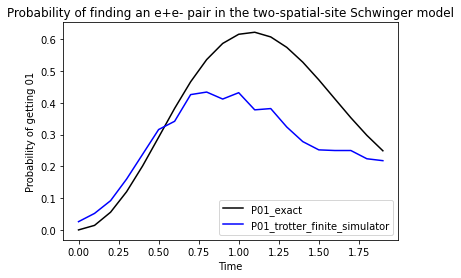

In [23]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

[{'00': 477, '01': 10, '10': 13}, {'00': 462, '01': 17, '10': 12, '11': 9}, {'00': 439, '01': 27, '10': 22, '11': 12}, {'00': 401, '01': 41, '10': 36, '11': 22}, {'00': 392, '01': 42, '10': 41, '11': 25}, {'00': 366, '01': 55, '10': 39, '11': 40}, {'00': 339, '01': 59, '10': 58, '11': 44}, {'00': 314, '01': 74, '10': 77, '11': 35}, {'00': 302, '01': 73, '10': 81, '11': 44}, {'00': 303, '01': 76, '10': 84, '11': 37}, {'00': 299, '01': 74, '10': 75, '11': 52}, {'00': 260, '01': 103, '10': 87, '11': 50}, {'00': 259, '01': 96, '10': 95, '11': 50}, {'00': 233, '01': 104, '10': 96, '11': 67}, {'00': 238, '01': 105, '10': 82, '11': 75}, {'00': 209, '01': 113, '10': 96, '11': 82}, {'00': 209, '01': 110, '10': 94, '11': 87}, {'00': 213, '01': 107, '10': 114, '11': 66}, {'00': 183, '01': 133, '10': 108, '11': 76}, {'00': 176, '01': 125, '10': 122, '11': 77}]
Time per time step= []

Total time= 90.15500688552856

Probability 01 =  [0.026000000000000002, 0.024, 0.044, 0.07200000000000001, 0.082, 0

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

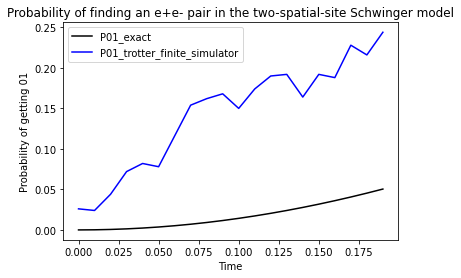

In [24]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.01)
# time step
dt = 0.01
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_small, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

[{'00': 476, '01': 13, '10': 11}, {'00': 333, '01': 20, '10': 143, '11': 4}, {'00': 153, '01': 42, '10': 282, '11': 23}, {'00': 140, '01': 112, '10': 209, '11': 39}, {'00': 216, '01': 109, '10': 99, '11': 76}, {'00': 259, '01': 109, '10': 74, '11': 58}, {'00': 233, '01': 103, '10': 81, '11': 83}, {'00': 229, '01': 90, '10': 101, '11': 80}, {'00': 179, '01': 133, '10': 115, '11': 73}, {'00': 132, '01': 130, '10': 170, '11': 68}, {'00': 136, '01': 121, '10': 177, '11': 66}, {'00': 227, '01': 97, '10': 117, '11': 59}, {'00': 263, '01': 97, '10': 66, '11': 74}, {'00': 211, '01': 89, '10': 126, '11': 74}, {'00': 147, '01': 99, '10': 173, '11': 81}, {'00': 133, '01': 118, '10': 161, '11': 88}, {'00': 131, '01': 148, '10': 111, '11': 110}, {'00': 173, '01': 134, '10': 109, '11': 84}, {'00': 172, '01': 107, '10': 119, '11': 102}, {'00': 171, '01': 96, '10': 124, '11': 109}]
Time per time step= []

Total time= 64.16687226295471

Probability 01 =  [0.022, 0.28600000000000003, 0.5640000000000001,

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

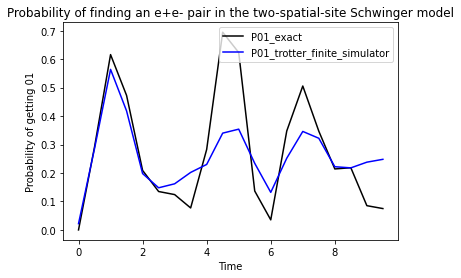

In [25]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.5)
# time step
dt = 0.5
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_large, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')